In [129]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

### HAN-WOL Population

In [230]:
pop = pd.read_excel('/resources/9. Location Data/CAPSTONE/HAN pop.xlsx')
pop

,Year,HAN,WOL
0,2011,6761300,202068
1,2012,6865200,203181
2,2013,6977000,205157
3,2014,7095900,206666
4,2015,7216000,208875
5,2016,7328400,211446
6,2017,7420100,213370


In [236]:
pop.set_index('Year',inplace = True)

In [232]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Year')

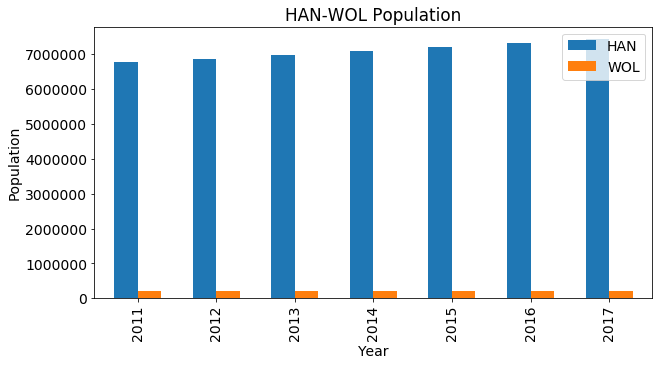

In [269]:
pop.plot(kind='bar',figsize=(10,5), width = 0.6)
plt.title('HAN-WOL Population')
plt.ylabel('Population')
plt.xlabel('Year')

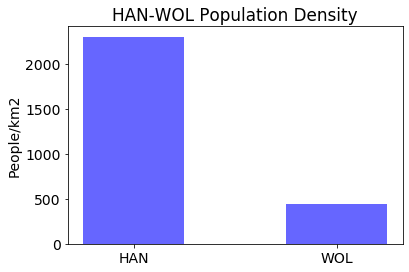

In [272]:
objects = ('HAN', 'WOL')
y_pos = np.arange(len(objects))
performance = [2300,442]

plt.bar(y_pos, performance, align='center', alpha=0.6, color = 'b', width=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('People/km2')
plt.title('HAN-WOL Population Density')

plt.show()

## HAN lifestyle

In [131]:
han = pd.read_excel('/resources/9. Location Data/CAPSTONE/data HAN.xlsx')
han

,District,Neighbourhood,Latitude,Longitude
0,Hoan Kiem,Trang Tien,21.024763,-105.854815
1,Hoan Kiem,Ly Thai To,21.030921,-105.855744
2,Hoan Kiem,Hang Bai,21.021050,-105.852660
3,Hai Ba Trung,Bach Mai,21.003957,-105.843608
4,Hai Ba Trung,Minh Khai,20.995925,-105.850126
5,Hai Ba Trung,Pho Hue,21.013456,-105.851752


In [4]:
address = 'Hanoi'

geolocator = Nominatim(user_agent="hn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Hanoi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hanoi are 21.0294498, 105.8544441.


In [5]:
map_hn = folium.Map(location=[latitude, longitude], zoom_start=15)
map_hn

In [6]:
CLIENT_ID = 'QZESHW0N5TX5RCHK4CUQIRT5YKYKCTCTSUBDGTER3V5YK45H' # your Foursquare ID
CLIENT_SECRET = 'E0KP1OAWHRN53NTPZTFUQY5ABHRZ0YIMEFCW1IGZTXN41PU1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Ethan credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Ethan credentails:
CLIENT_ID: QZESHW0N5TX5RCHK4CUQIRT5YKYKCTCTSUBDGTER3V5YK45H
CLIENT_SECRET:E0KP1OAWHRN53NTPZTFUQY5ABHRZ0YIMEFCW1IGZTXN41PU1


### Trang Tien neighbourhood in Hoan Kiem district

In [7]:
address = 'Trang Tien, Hoan Kiem, Vietnam'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Trang Tien are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Trang Tien are 21.0247631, 105.8548152.


In [8]:
map_tt = folium.Map(location=[21.0247631, 105.8548152], zoom_start=20)
map_tt

In [363]:
# Explore calls

LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 1000 # define distance

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
   21.0247631, 
   105.8548152, 
    radius, 
    LIMIT)

In [391]:
results = requests.get(url).json()

In [365]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [366]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues1.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Sofitel Legend Metropole Hanoi,Hotel,21.025412,105.856375
1,Pizza 4P,Italian Restaurant,21.025141,105.854438
2,El Gaucho,Steakhouse,21.024579,105.856475
3,Opera Club Novel,Vietnamese Restaurant,21.024660,105.856291
4,L'Espace - Institut Français de Hanoï (Trung T...,Cultural Center,21.024668,105.855832


In [367]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [343]:
print('There are around {0} coffee shops in downtown Hanoi'.format(nearby_venues[nearby_venues.categories.str.contains('Coffee')].shape[0]))
nearby_venues[nearby_venues.categories.str.contains('Coffee')]

There are around 14 cafes in downtown Hanoi


,name,categories,lat,lng
10,Starbucks,Coffee Shop,21.022716,105.852515
17,Starbucks,Coffee Shop,21.025216,105.857032
29,Chuồn Chuồn Phố,Coffee Shop,21.021821,105.852467
33,Starbucks Reserve Nhà Thờ,Coffee Shop,21.029162,105.850222
41,Dream Beans Coffee,Coffee Shop,21.029088,105.848596
51,Nhạc Cafe - Music Cafe,Coffee Shop,21.032465,105.855285
52,Cộng Càphê,Coffee Shop,21.028926,105.849460
66,Argento Cafe,Coffee Shop,21.022341,105.857652
73,The Note Coffee,Coffee Shop,21.031583,105.851175
77,Blackbird Coffee,Coffee Shop,21.030424,105.848534


In [347]:
print('There are around {0} cafes in downtown Hanoi'.format(nearby_venues[nearby_venues.categories.str.contains('Café')].shape[0]))
nearby_venues[nearby_venues.categories.str.contains('Café')]

There are around 7 cafes in downtown Hanoi


,name,categories,lat,lng
30,S' Patisserie,Café,21.025779,105.852577
32,Hoa 10 giờ Floral & Book Café,Café,21.030677,105.856144
44,Vintage 1976,Café,21.025965,105.853722
70,Coffee Bean & Tea Leaf,Café,21.021080,105.855937
75,haka Coffee,Café,21.030961,105.853731
87,Hanoi House Cafe,Café,21.029061,105.849366
88,Cong Caphe,Café,21.032113,105.851527


In [350]:
print('There are around {0} restaurants in downtown Hanoi'.format(nearby_venues[nearby_venues.categories.str.contains('Restaurant')].shape[0]))
nearby_venues[nearby_venues.categories.str.contains('Restaurant')]

There are around 22 restaurants in downtown Hanoi


,name,categories,lat,lng
1,Pizza 4P,Italian Restaurant,21.025141,105.854438
3,Opera Club Novel,Vietnamese Restaurant,21.024660,105.856291
8,Le Beaulieu,French Restaurant,21.026041,105.855637
12,Spices Garden,Vietnamese Restaurant,21.025537,105.856016
13,Ưu Đàm Chay,Vegetarian / Vegan Restaurant,21.022366,105.852487
15,Amato,Modern European Restaurant,21.023549,105.857972
22,Pane e Vino Restaurant,Italian Restaurant,21.024274,105.855752
28,Press Club,Restaurant,21.025290,105.856860
40,Club de L'Oriental Hanoi,Vietnamese Restaurant,21.025713,105.857643
48,Bánh Cuốn 14 Bảo Khánh,Vietnamese Restaurant,21.030196,105.850632


In [351]:
print('There are around {0} bars in downtown Hanoi'.format(nearby_venues[nearby_venues.categories.str.contains('Bar')].shape[0]))
nearby_venues[nearby_venues.categories.str.contains('Bar')]

There are around 7 bars in downtown Hanoi


,name,categories,lat,lng
5,Bamboo Bar,Hotel Bar,21.025566,105.855958
16,La Terrasse @ Sofitel Metropole Hotel,Hotel Bar,21.026066,105.855583
20,Wine & Cigar Lounge 1973,Wine Bar,21.023997,105.850994
38,Le Club,Hotel Bar,21.025562,105.856029
69,Tadioto,Bar,21.025557,105.857934
71,Twilight Sky Bar Rooftop,Cocktail Bar,21.032013,105.853535
76,Smoothies and Juices Trần Hưng Đạo,Juice Bar,21.020340,105.854575


In [373]:
print('There are around {0} hotels in downtown Hanoi'.format(nearby_venues[nearby_venues.categories.str.contains('Hotel')].shape[0]))
nearby_venues[nearby_venues.categories.str.contains('Hotel')]

There are around 16 hotels in downtown Hanoi


,name,categories,lat,lng
0,Sofitel Legend Metropole Hanoi,Hotel,21.025412,105.856375
5,Bamboo Bar,Hotel Bar,21.025566,105.855958
6,Hotel de L'Opera,Hotel,21.024572,105.855754
11,Apricot Boutique Hotel,Hotel,21.028239,105.851055
16,La Terrasse @ Sofitel Metropole Hotel,Hotel Bar,21.026066,105.855583
27,The Lapis Hotel,Hotel,21.019770,105.855933
35,Hanoi La Selva Hotel,Hotel,21.031374,105.854886
38,Le Club,Hotel Bar,21.025562,105.856029
49,Conifer Hotel,Hotel,21.025284,105.857253
57,Hanoi Emerald Waters Hotel,Hotel,21.031286,105.855153


## WOL Lifestyle

In [377]:
wol = pd.read_excel('/resources/9. Location Data/CAPSTONE/data WOL.xlsx')
wol

,Borough,Neighbourhood,Latitude,Longitude
0,Wollongong,Wollongong,-34.424394,150.893850
1,Wollongong,West Wollongong,-34.424254,150.867353
2,Wollongong,North Wollongong,-34.406579,150.895737
3,Wollongong,Thirroul,-34.316469,150.918932
4,Wollongong,Keiraville,-34.409254,150.872973
5,Wollongong,Daptop,-34.493037,150.791789


In [378]:
map_wol = folium.Map(location=[-34.424394, 150.893850], zoom_start=15)
map_wol

In [392]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define distance

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
   -34.424394, 
   150.893850, 
    radius, 
    LIMIT)

results = requests.get(url).json()

In [388]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,His Boy Elroy,Bar,-34.423774,150.893253
1,Kürtősh,Dessert Shop,-34.425389,150.894086
2,Swell Cafe,Café,-34.425568,150.896030
3,Lee and Me,Café,-34.425717,150.898337
4,Beast & Bread,Coffee Shop,-34.424933,150.892818


In [381]:
print('There are around {0} bars in downtown Wollongong'.format(nearby_venues[nearby_venues.categories.str.contains('Bar')].shape[0]))
nearby_venues[nearby_venues.categories.str.contains('Bar')]

There are around 6 bars in downtown Wollongong


,name,categories,lat,lng
0,His Boy Elroy,Bar,-34.423774,150.893253
10,The Little Prince,Cocktail Bar,-34.425937,150.894231
36,Boost Juice,Juice Bar,-34.424985,150.894064
52,Howling Wolf,Cocktail Bar,-34.425855,150.899009
55,Humber,Cocktail Bar,-34.424910,150.892627
75,The Steelers Club,Sports Bar,-34.427348,150.901498


In [382]:
print('There are around {0} coffee shops in downtown Wollongong'.format(nearby_venues[nearby_venues.categories.str.contains('Coffee')].shape[0]))
nearby_venues[nearby_venues.categories.str.contains('Coffee')]

There are around 3 coffee shops in downtown Wollongong


,name,categories,lat,lng
4,Beast & Bread,Coffee Shop,-34.424933,150.892818
16,Gloria Jean's Coffees,Coffee Shop,-34.424910,150.894265
56,The Coffee Club,Coffee Shop,-34.426114,150.899908


In [383]:
print('There are around {0} restaurants in downtown Wollongong'.format(nearby_venues[nearby_venues.categories.str.contains('Restaurant')].shape[0]))
nearby_venues[nearby_venues.categories.str.contains('Restaurant')]

There are around 19 restaurants in downtown Wollongong


,name,categories,lat,lng
5,Amigos,Mexican Restaurant,-34.421853,150.893764
6,Zambrero,Mexican Restaurant,-34.425767,150.899036
8,Caveau,French Restaurant,-34.421990,150.893720
9,Mylan Restaurant,Vietnamese Restaurant,-34.423993,150.893332
11,Samaras,Lebanese Restaurant,-34.425452,150.899907
12,Kinn Thai Restaurant,Thai Restaurant,-34.424077,150.893315
13,Trang Vietnamese Resturant,Vietnamese Restaurant,-34.423144,150.893446
29,Roppongi Japanese,Japanese Restaurant,-34.422871,150.891124
32,Chefs Choice,Asian Restaurant,-34.423350,150.893013
38,Food World Gourmet Cafe,Asian Restaurant,-34.422878,150.893495


In [384]:
print('There are around {0} cafes in downtown Wollongong'.format(nearby_venues[nearby_venues.categories.str.contains('Café')].shape[0]))
nearby_venues[nearby_venues.categories.str.contains('Café')]

There are around 11 cafes in downtown Wollongong


,name,categories,lat,lng
2,Swell Cafe,Café,-34.425568,150.896030
3,Lee and Me,Café,-34.425717,150.898337
14,Bar Pellegrini,Café,-34.423823,150.893427
15,Bostons Espresso,Café,-34.426974,150.890681
17,Bull & Bear,Café,-34.422220,150.893160
18,SandyGoodWich,Café,-34.425568,150.886922
24,Lower East,Café,-34.425801,150.899026
25,City Diggers,Café,-34.426176,150.894981
28,Litani's,Café,-34.425106,150.899912
33,Lettuce B. Frank Wholefoods Café,Café,-34.426010,150.888640


In [387]:
print('There are around {0} hotels in downtown Wollongong'.format(nearby_venues[nearby_venues.categories.str.contains('Hotel')].shape[0]))
nearby_venues[nearby_venues.categories.str.contains('Hotel')]

There are around 1 hotels in downtown Wollongong


,name,categories,lat,lng
69,Sage Hotel Wollongong,Hotel,-34.42872,150.900969
